# 0. Import Libraries

In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split

# Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# Check the versions are correct
print(tf.__version__)
print(keras.__version__)

2.17.0
3.4.1


# 1. Load and Visualize Data

## 1.1 Load Data

In [3]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Extract features and labels ('Outcome')
features = diabetes_data.drop(columns=['Outcome'])
labels = diabetes_data['Outcome']

print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

Features shape: (768, 8)
Labels shape: (768,)


In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 1.2 Visualize Data

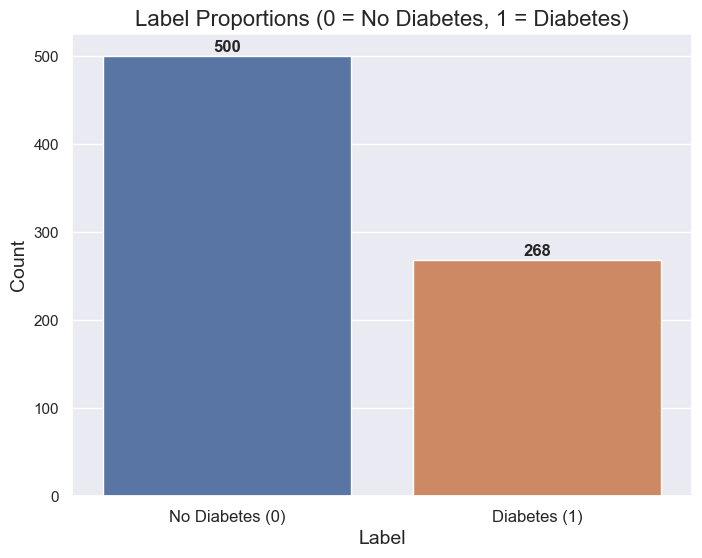

In [7]:
label_counts = labels.value_counts()

# Plot a bar chart for label proportions
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)

for index, value in enumerate(label_counts.values):
    plt.text(index, value + 5, str(value), ha='center', fontweight='bold')

plt.title('Label Proportions (0 = No Diabetes, 1 = Diabetes)', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['No Diabetes (0)', 'Diabetes (1)'], fontsize=12)

plt.show()

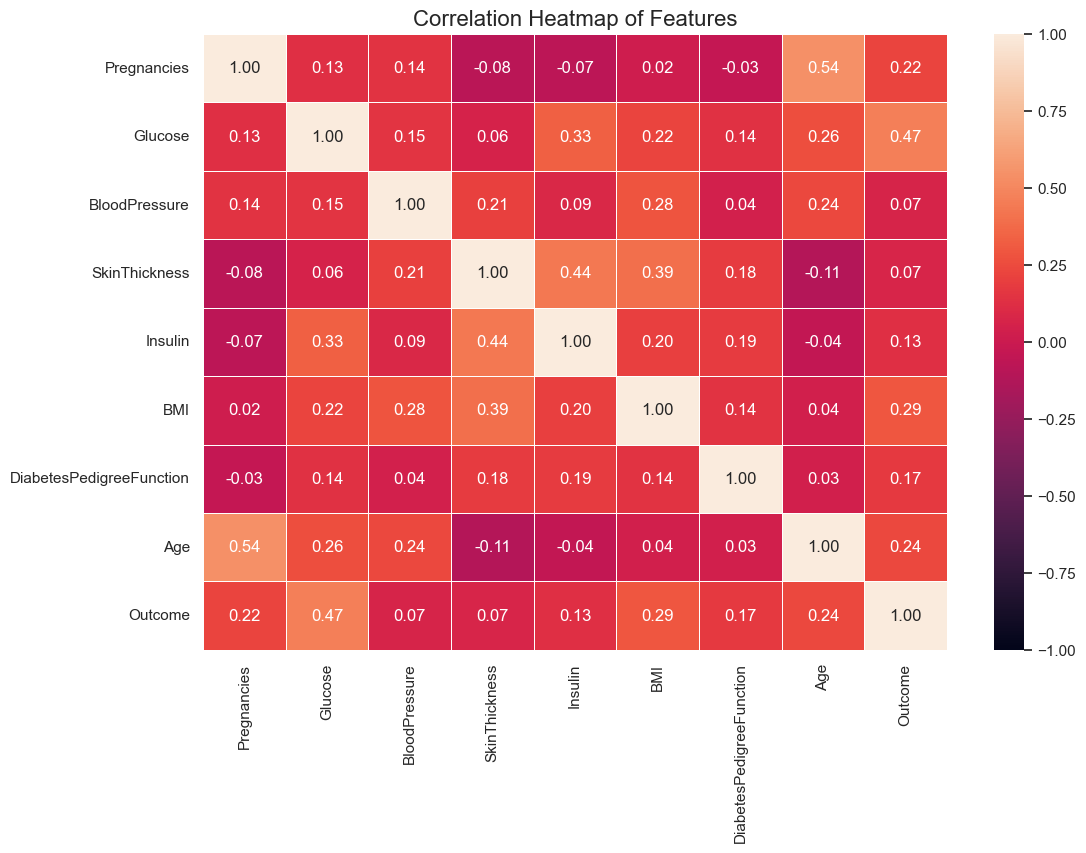

In [8]:
correlation_matrix = diabetes_data.corr()

# Draw the heatmap with the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

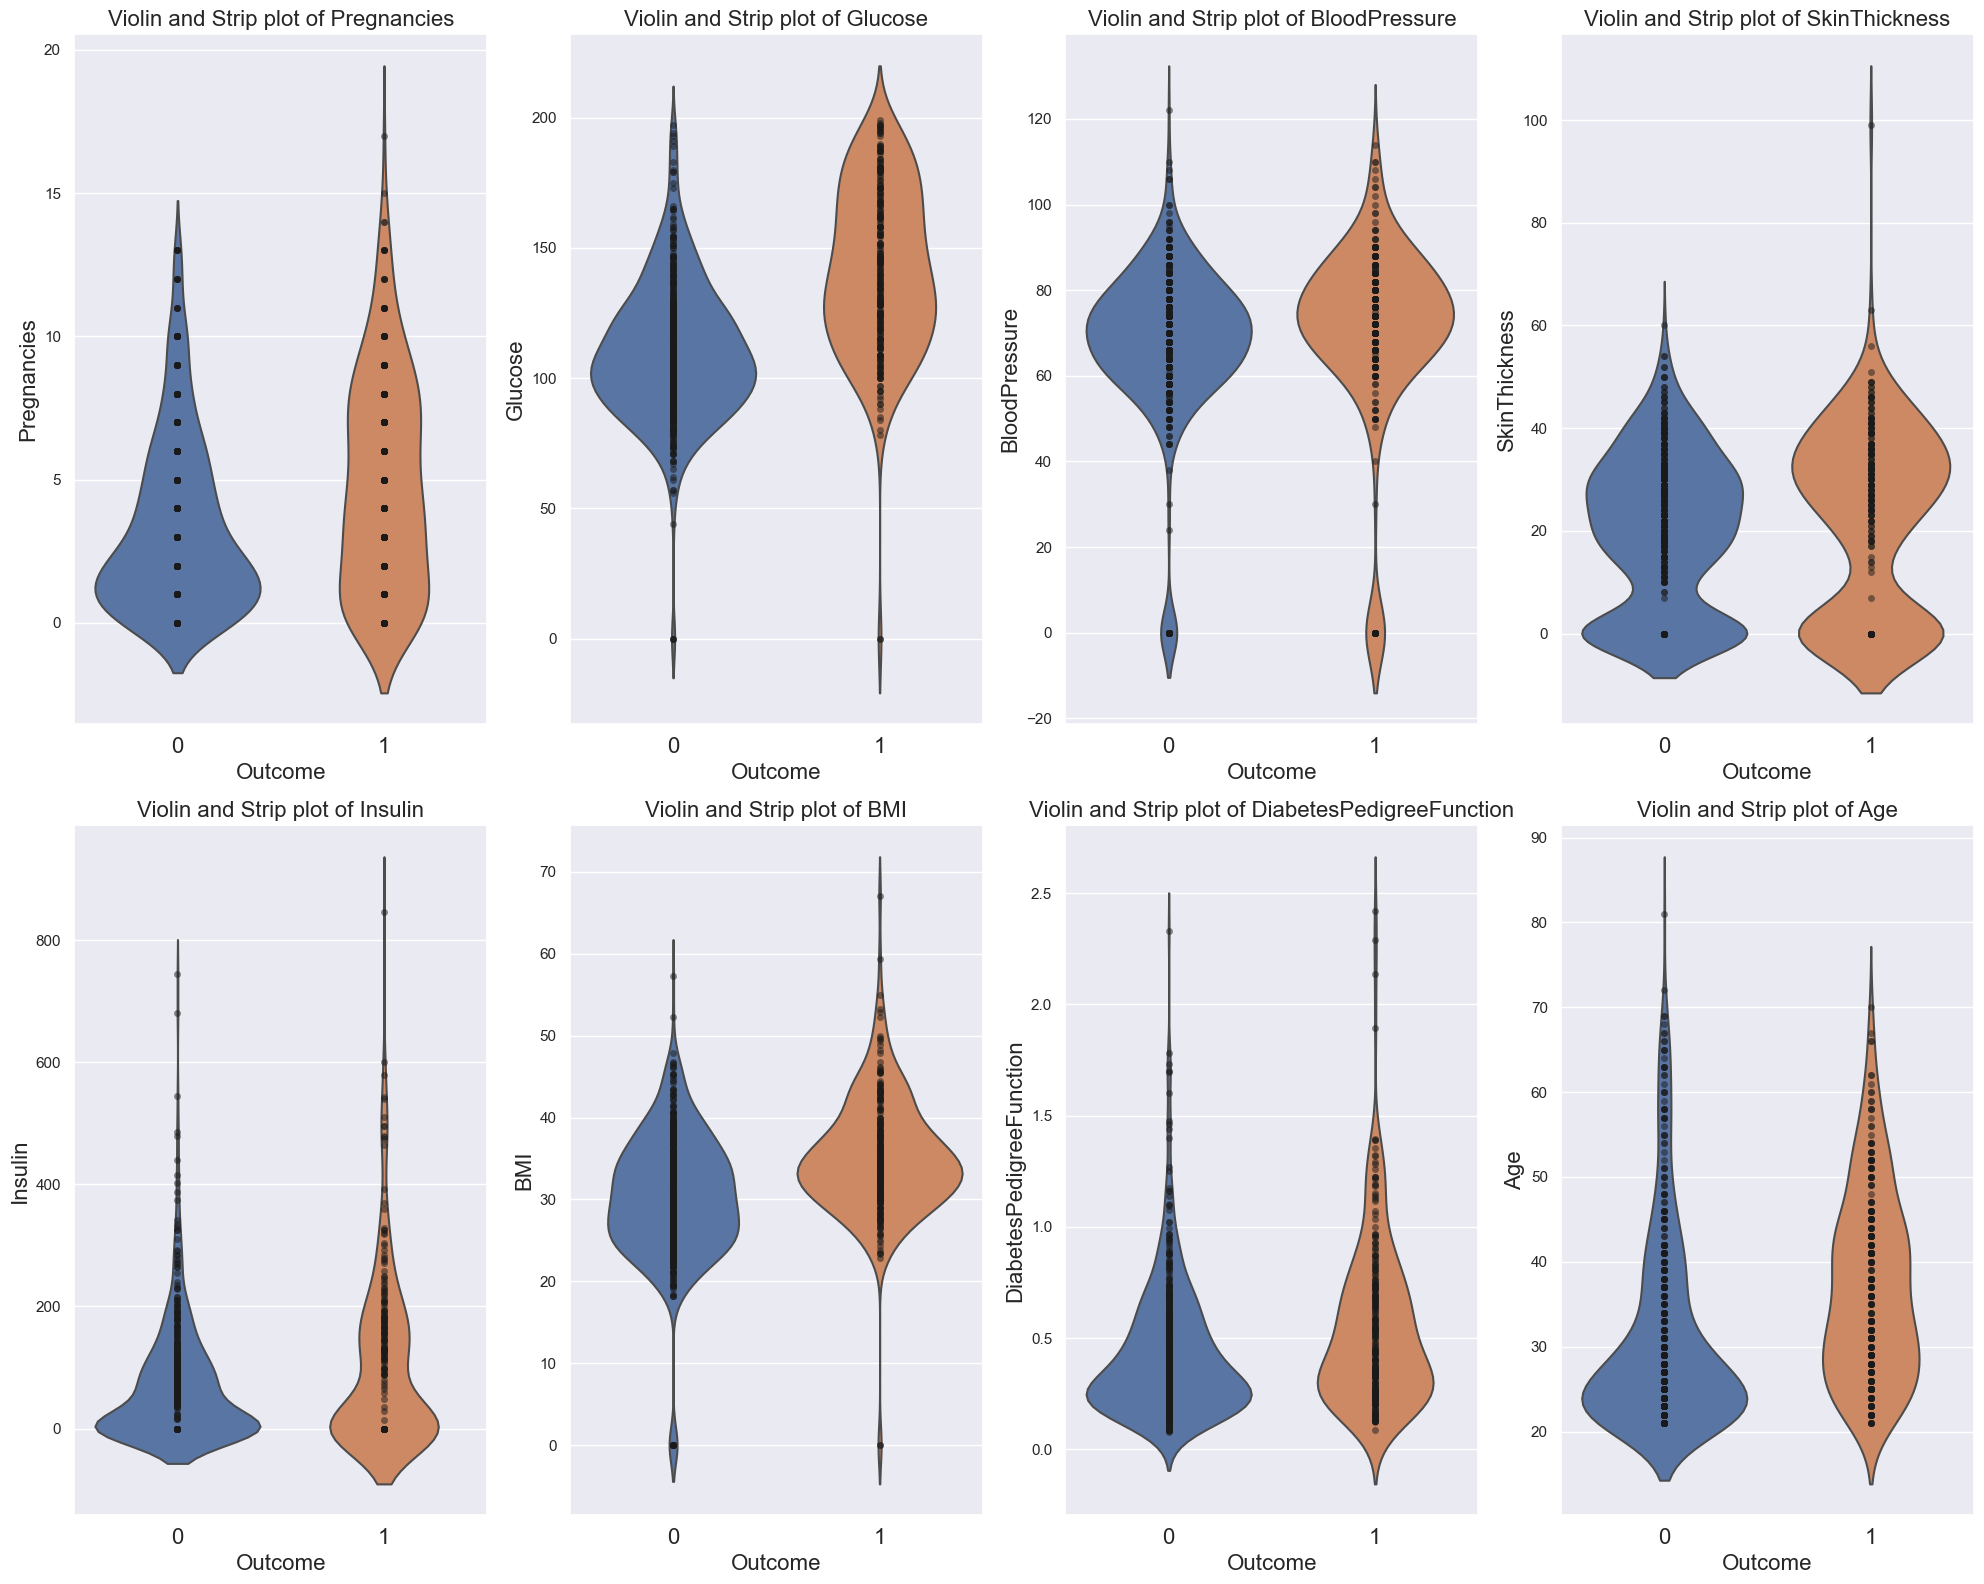

In [9]:
feature_columns = features.columns

fig, axes = plt.subplots(2, 4, figsize=(20, 16))
axes = axes.flatten()
sns.set(font_scale=1, style='whitegrid')

# Create a violin plot with a strip plot for each feature
for i, feature in enumerate(feature_columns):
    sns.stripplot(ax=axes[i], x=labels, y=features[feature], color='k', alpha=0.5, jitter=False)
    sns.violinplot(ax=axes[i], x=labels, y=features[feature], inner=None)
    axes[i].set_title(f'Violin and Strip plot of {feature}', fontsize=16)
    axes[i].set_xlabel('Outcome', fontsize=16)
    axes[i].set_ylabel(feature, fontsize=16)
    axes[i].tick_params(axis='x', labelsize=16)

plt.tight_layout()
plt.show()

In [33]:
filtered_data = diabetes_data.copy()

filtered_data.loc[filtered_data['Glucose'] == 0, 'Glucose'] = np.nan
filtered_data.loc[filtered_data['BloodPressure'] == 0, 'BloodPressure'] = np.nan
filtered_data.loc[filtered_data['BMI'] == 0, 'BMI'] = np.nan
filtered_data.loc[(filtered_data['Insulin'] == 0), 'Insulin'] = np.nan
filtered_data.loc[(filtered_data['SkinThickness'] == 0) | (filtered_data['SkinThickness'] > 75), 'SkinThickness'] = np.nan

print(filtered_data.isna().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               228
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# 2. Split the Data and Pre-process

## 2.1 Split Data

In [34]:
# Split the data
X = filtered_data.drop(columns=['Outcome'])
y = filtered_data['Outcome']

# First split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Second split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42)

y_train_full = np.array(y_train_full)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Display the shapes to confirm
print(f"Training data shape : {X_train.shape}")
print(f"Training label shape : {y_train.shape}")

print(f"Validation data shape : {X_val.shape}")
print(f"Validation label shape : {y_val.shape}")

print(f"Test data shape : {X_test.shape}")
print(f"Test label shape : {y_test.shape}")

Training data shape : (491, 8)
Training label shape : (491,)
Validation data shape : (123, 8)
Validation label shape : (123,)
Test data shape : (154, 8)
Test label shape : (154,)


In [35]:
train_counts = np.bincount(y_train)
val_counts = np.bincount(y_val)
test_counts = np.bincount(y_test)

print(f"Training data distribution: {train_counts[0]} Non Diabetic, {train_counts[1]} Diabetic")
print(f"Validation data distribution: {val_counts[0]} Non Diabetic, {val_counts[1]} Diabetic")
print(f"Test data distribution: {test_counts[0]} Non Diabetic, {test_counts[1]} Diabetic")

Training data distribution: 320 Non Diabetic, 171 Diabetic
Validation data distribution: 80 Non Diabetic, 43 Diabetic
Test data distribution: 100 Non Diabetic, 54 Diabetic


## 2.2 Pre-processing step

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define a pipeline for preprocessing
preproc_pl = Pipeline([
    ('imputer', IterativeImputer(random_state=42)),  # Impute np.nan values using IterativeImputer
    ('scaler', StandardScaler())
])

In [14]:
# Apply the preprocessing pipeline to the training and validation data
X_train_processed = preproc_pl.fit_transform(X_train)
X_val_processed = preproc_pl.transform(X_val)

## 2.3 Common Functions

In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def calculate_performance_metrics(y_true, y_pred, model_name):
    """
    Calculate and return the performance metrics including accuracy, recall, precision, F1-score,
    and confusion matrix.
    """
    # Calculate performance metrics
    accuracy_val = accuracy_score(y_true, y_pred)
    recall_val = recall_score(y_true, y_pred, average='weighted')
    precision_val = precision_score(y_true, y_pred, average='weighted')
    f1_val = f1_score(y_true, y_pred, average='weighted')

    conf_matrix_val = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_val, annot=True, fmt='d', xticklabels=['0 (Non Diabetic)', '1 (Diabetic)'], yticklabels=['0 (Non Diabetic)', '1 (Diabetic)'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Return the metrics in a dictionary
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_val,
        'Recall': recall_val,
        'Precision': precision_val,
        'F1 Score': f1_val,
    }

    return metrics

In [16]:
def show_epoch(history):
    metrics_list = ['loss', 'accuracy', 'f1score', 'recall']
    num_metrics = len(metrics_list)
    num_cols = 2
    num_rows = (num_metrics + 1) // num_cols

    plt.figure(figsize=(15, num_rows * 5))

    for i, metric in enumerate(metrics_list):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.plot(history.history[metric], label=f'Training {metric}')
        plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
        plt.title(f'{metric.capitalize()} Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()

    plt.tight_layout()
    plt.show()

In [36]:
f1score_metric = tf.keras.metrics.F1Score(average='weighted')

def f1score(y_true, y_pred):
    y_true = tf.reshape(y_true, (-1, 1))
    y_pred = tf.round(y_pred)

    f1score_metric.reset_state()
    f1score_metric.update_state(y_true, y_pred)
    
    return f1score_metric.result()

# 3. Compare Models, Select Best Model and Evaluate

## 3.1 Support Vector Machines

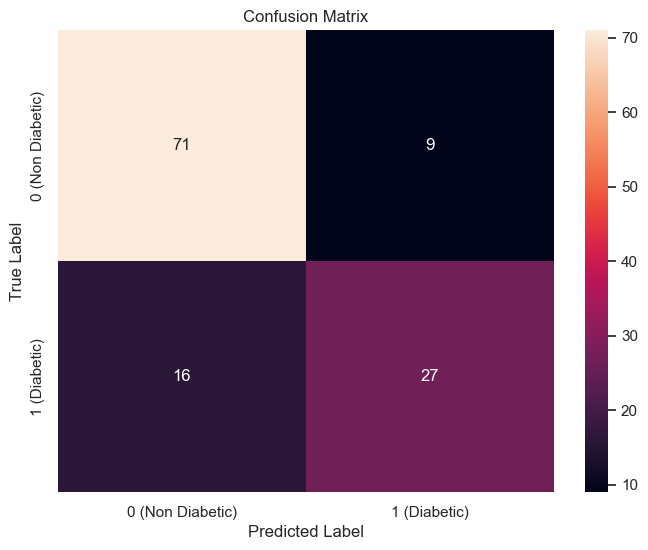

SVM Model Metrics:
{'Model': 'SVM Model', 'Accuracy': 0.7967479674796748, 'Recall': 0.7967479674796748, 'Precision': 0.7929866367629194, 'F1 Score': 0.7920029037325164}


In [37]:
from sklearn.svm import SVC

svm_pipeline = Pipeline(steps=[
    ('preprocessor', preproc_pl),
    ('classifier', SVC(random_state=32))
])

svm_pipeline.fit(X_train, y_train)
y_pred_val_svm = svm_pipeline.predict(X_val)
svm_metrics = calculate_performance_metrics(y_val, y_pred_val_svm, 'SVM Model')
print('SVM Model Metrics:')
print(svm_metrics)

## 3.2 Single Layer Perceptron (SLP) - Baseline

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6788 - f1score: 0.6007 - loss: 0.5911 - precision: 0.5312 - recall: 0.6991 - val_accuracy: 0.7317 - val_f1score: 0.6474 - val_loss: 0.5744 - val_precision: 0.6000 - val_recall: 0.6977
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6975 - f1score: 0.5940 - loss: 0.6080 - precision: 0.5522 - recall: 0.6624 - val_accuracy: 0.7398 - val_f1score: 0.6540 - val_loss: 0.5659 - val_precision: 0.6122 - val_recall: 0.6977
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6922 - f1score: 0.6112 - loss: 0.6001 - precision: 0.5786 - recall: 0.6691 - val_accuracy: 0.7561 - val_f1score: 0.6791 - val_loss: 0.5579 - val_precision: 0.6327 - val_recall: 0.7209
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6782 - f1score: 0.5565 - loss: 0.5927 - precision: 0.5305 - recall: 0.6203 - val_accuracy: 0.7561 - val_f1score: 0.6791 - val_loss: 0.5498 - val_precision: 0.6327 - val_recall: 0.7209
Epo

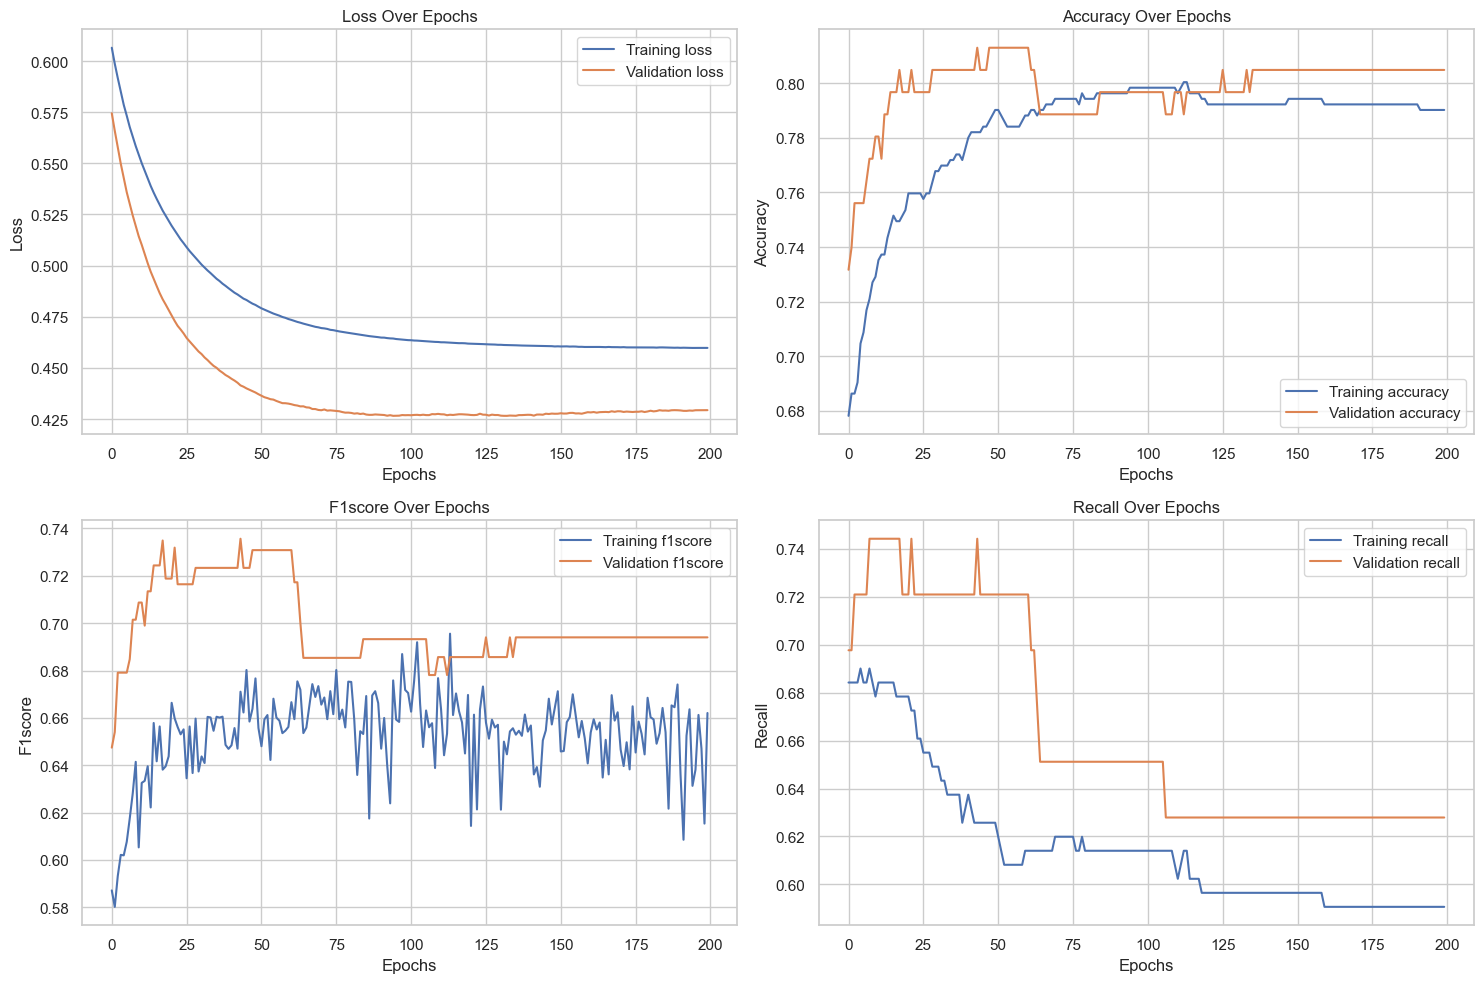

In [19]:
# Define the baseline Single Layer Perceptron (SLP) model
baseline_slp_model = keras.Sequential([
    keras.layers.Input(shape=(X_train_processed.shape[1],)), 
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_slp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'recall', 'precision', f1score])

baseline_slp_history = baseline_slp_model.fit(
    X_train_processed, y_train, 
    epochs=200,
    validation_data=(X_val_processed, y_val), 
    batch_size=32
)

show_epoch(baseline_slp_history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


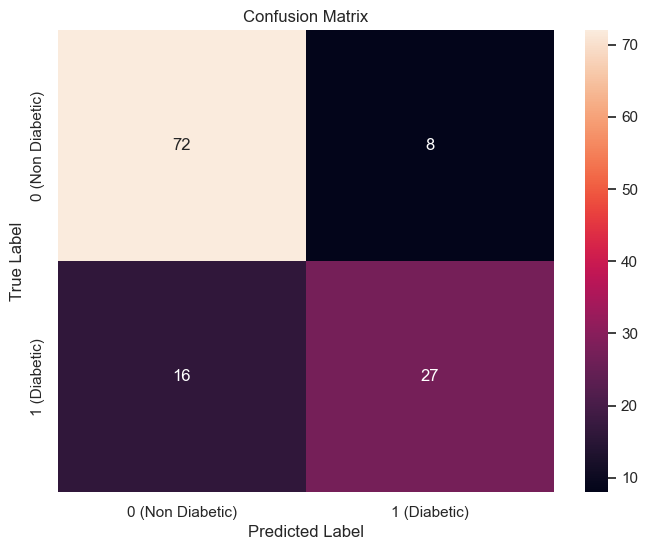

{'Model': 'Baseline SLP Model', 'Accuracy': 0.8048780487804879, 'Recall': 0.8048780487804879, 'Precision': 0.8018371872030408, 'F1 Score': 0.7995175556151167}


In [20]:
y_pred_baseline_slp = baseline_slp_model.predict(X_val_processed)

# Convert predicted probabilities to binary classes (0 or 1)
y_pred_classes_baseline_slp = (y_pred_baseline_slp > 0.5).astype(int)
y_true_classes_baseline_slp = y_val

baseline_slp_metrics = calculate_performance_metrics(y_true_classes_baseline_slp, y_pred_classes_baseline_slp, "Baseline SLP Model")
print(baseline_slp_metrics)

## 3.3 Single Layer Perceptron (SLP) - Early Stopping

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2689 - f1score: 0.1748 - loss: 1.0794 - precision: 0.1546 - recall: 0.2177 - val_accuracy: 0.2927 - val_f1score: 0.1714 - val_loss: 1.0643 - val_precision: 0.1452 - val_recall: 0.2093
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2985 - f1score: 0.2033 - loss: 1.0357 - precision: 0.1726 - recall: 0.2557 - val_accuracy: 0.3008 - val_f1score: 0.1735 - val_loss: 1.0337 - val_precision: 0.1475 - val_recall: 0.2093
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3143 - f1score: 0.2062 - loss: 0.9998 - precision: 0.1754 - recall: 0.2696 - val_accuracy: 0.3008 - val_f1score: 0.1735 - val_loss: 1.0054 - val_precision: 0.1475 - val_recall: 0.2093
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3172 - f1score: 0.1934 - loss: 1.0093 - precision: 0.1679 - recall: 0.2476 - val_accuracy: 0.2927 - val_f1score: 0.1719 - val_loss: 0.9772 - val_precision: 0.1452 - val_recall: 0.2093
Epo

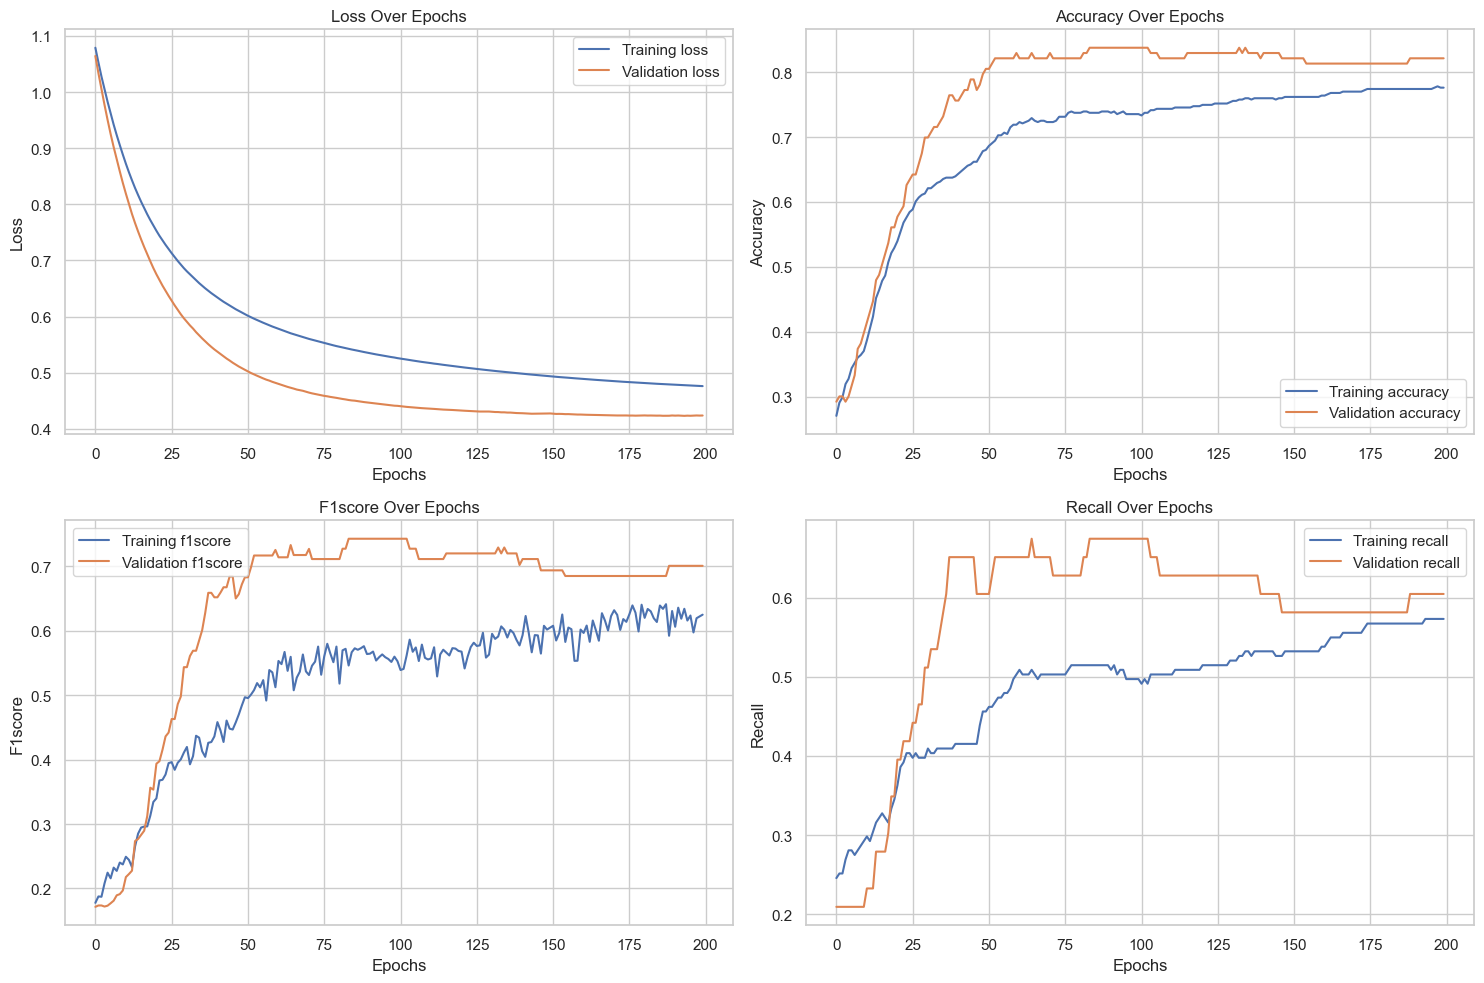

In [21]:
slp_opt1 = keras.Sequential([
    keras.layers.Input(shape=(X_train_processed.shape[1],)),   
    keras.layers.Dense(1, activation='sigmoid')               
])

slp_opt1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'recall', 'precision', f1score])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

slp_opt1_history = slp_opt1.fit(
    X_train_processed, y_train, 
    epochs=200, 
    validation_data=(X_val_processed, y_val), 
    callbacks=[early_stopping], 
    batch_size=32
)

show_epoch(slp_opt1_history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


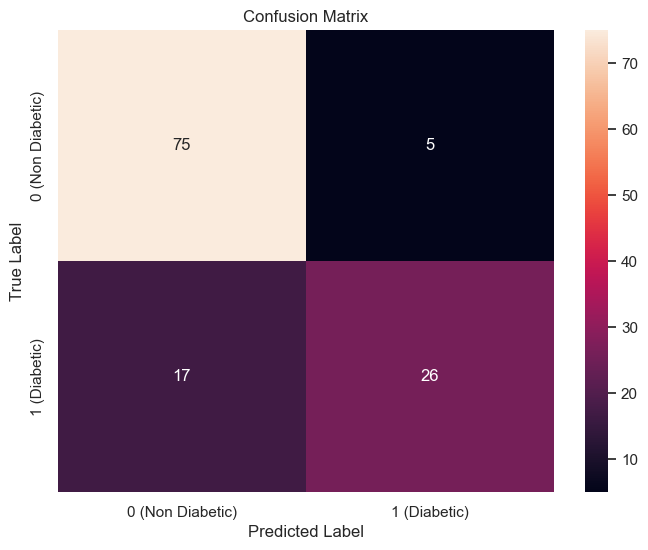

{'Model': 'SLP Model - Early Stopping', 'Accuracy': 0.8211382113821138, 'Recall': 0.8211382113821138, 'Precision': 0.8234301417347974, 'F1 Score': 0.8128752689161083}


In [22]:
y_pred_slp_opt1 = slp_opt1.predict(X_val_processed)
y_pred_classes_slp_opt1 = (y_pred_slp_opt1 > 0.5).astype(int)
y_true_classes_slp_opt1 = y_val

nn_slp_metrics = calculate_performance_metrics(y_true_classes_slp_opt1, y_pred_classes_slp_opt1, "SLP Model - Early Stopping")
print(nn_slp_metrics)

## 3.4 Single Layer Perceptron (SLP) - Class Weights

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3947 - f1score: 0.3016 - loss: 0.8171 - precision: 0.2505 - recall: 0.4276 - val_accuracy: 0.3984 - val_f1score: 0.3772 - val_loss: 0.8312 - val_precision: 0.2987 - val_recall: 0.5349
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4125 - f1score: 0.3675 - loss: 0.8444 - precision: 0.3154 - recall: 0.4682 - val_accuracy: 0.4065 - val_f1score: 0.3899 - val_loss: 0.8103 - val_precision: 0.3077 - val_recall: 0.5581
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4425 - f1score: 0.3662 - loss: 0.7896 - precision: 0.3045 - recall: 0.4794 - val_accuracy: 0.4309 - val_f1score: 0.4191 - val_loss: 0.7902 - val_precision: 0.3291 - val_recall: 0.6047
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4747 - f1score: 0.3921 - loss: 0.7710 - precision: 0.3180 - recall: 0.5252 - val_accuracy: 0.4472 - val_f1score: 0.4250 - val_loss: 0.7705 - val_precision: 0.3377 - val_recall: 0.6047
Epo

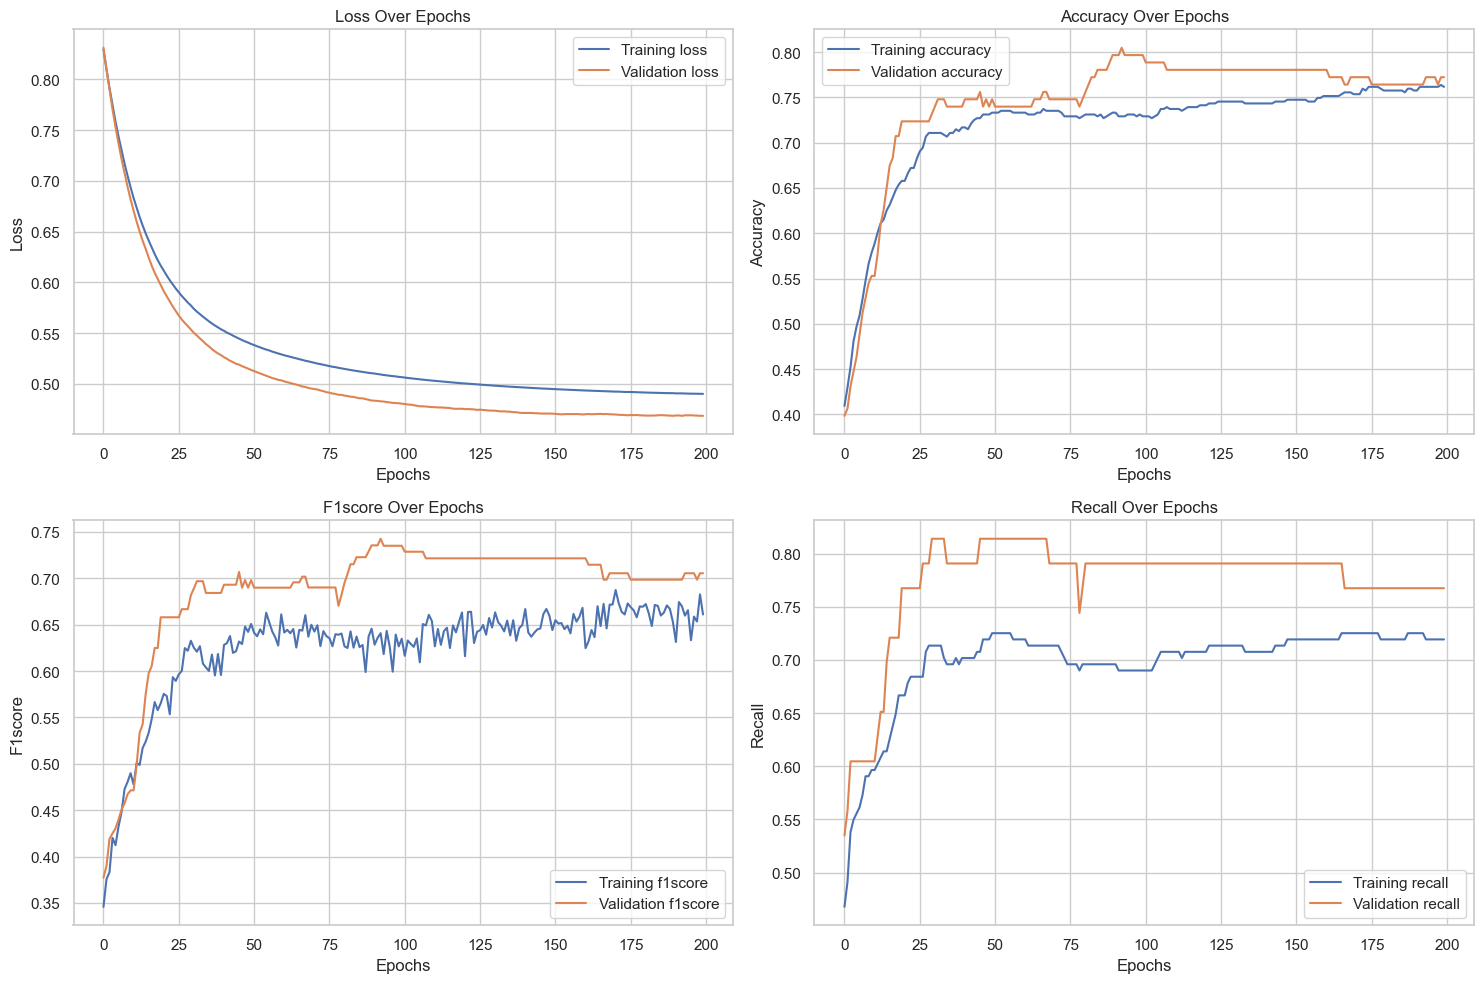

In [38]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

slp_opt2 = keras.Sequential([
    keras.layers.Input(shape=(X_train_processed.shape[1],)), 
    keras.layers.Dense(1, activation='sigmoid')
])

slp_opt2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'recall', 'precision', f1score])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

slp_opt2_history = slp_opt2.fit(
    X_train_processed, y_train,
    epochs=200,
    class_weight=class_weights,
    validation_data=(X_val_processed, y_val),
    callbacks=[early_stopping],
)

show_epoch(slp_opt2_history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


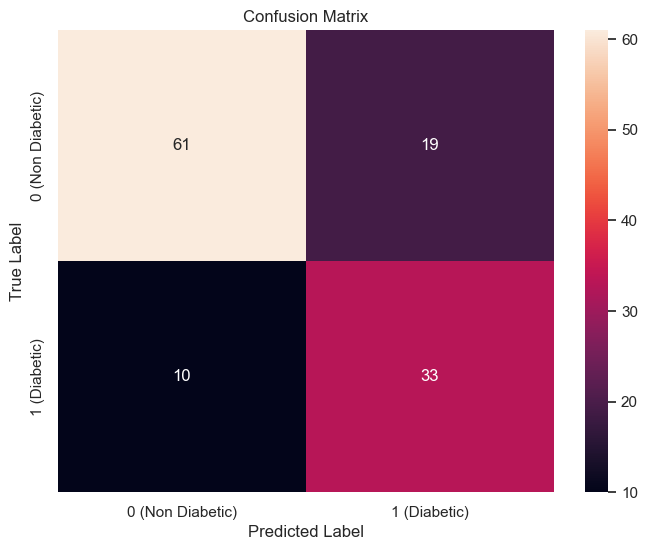

{'Model': 'SLP Model - Class Weights', 'Accuracy': 0.7642276422764228, 'Recall': 0.7642276422764228, 'Precision': 0.7806573650785261, 'F1 Score': 0.7683694780482138}


In [39]:
y_pred_slp_opt2 = slp_opt2.predict(X_val_processed)
y_pred_classes_slp_opt2 = (y_pred_slp_opt2 > 0.5).astype(int)
y_true_classes_slp_opt2 = y_val

slp_opt2_metrics = calculate_performance_metrics(y_true_classes_slp_opt2, y_pred_classes_slp_opt2, "SLP Model - Class Weights")
print(slp_opt2_metrics)

## 3.5 Model Multi Layer Perceptron (1 Hidden Layer)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3183 - f1score: 0.4160 - loss: 0.9134 - precision: 0.2872 - recall: 0.7854 - val_accuracy: 0.3659 - val_f1score: 0.4169 - val_loss: 0.7819 - val_precision: 0.3118 - val_recall: 0.6744
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4105 - f1score: 0.4572 - loss: 0.7440 - precision: 0.3423 - recall: 0.7226 - val_accuracy: 0.6098 - val_f1score: 0.5401 - val_loss: 0.6532 - val_precision: 0.4603 - val_recall: 0.6744
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6601 - f1score: 0.5055 - loss: 0.6569 - precision: 0.4860 - recall: 0.5843 - val_accuracy: 0.7561 - val_f1score: 0.6655 - val_loss: 0.5708 - val_precision: 0.6383 - val_recall: 0.6977
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7261 - f1score: 0.6269 - loss: 0.5906 - precision: 0.6505 - recall: 0.6162 - val_accuracy: 0.8293 - val_f1score: 0.7466 - val_loss: 0.5174 - val_precision: 0.7750 - val_recall: 0.7209
Epo

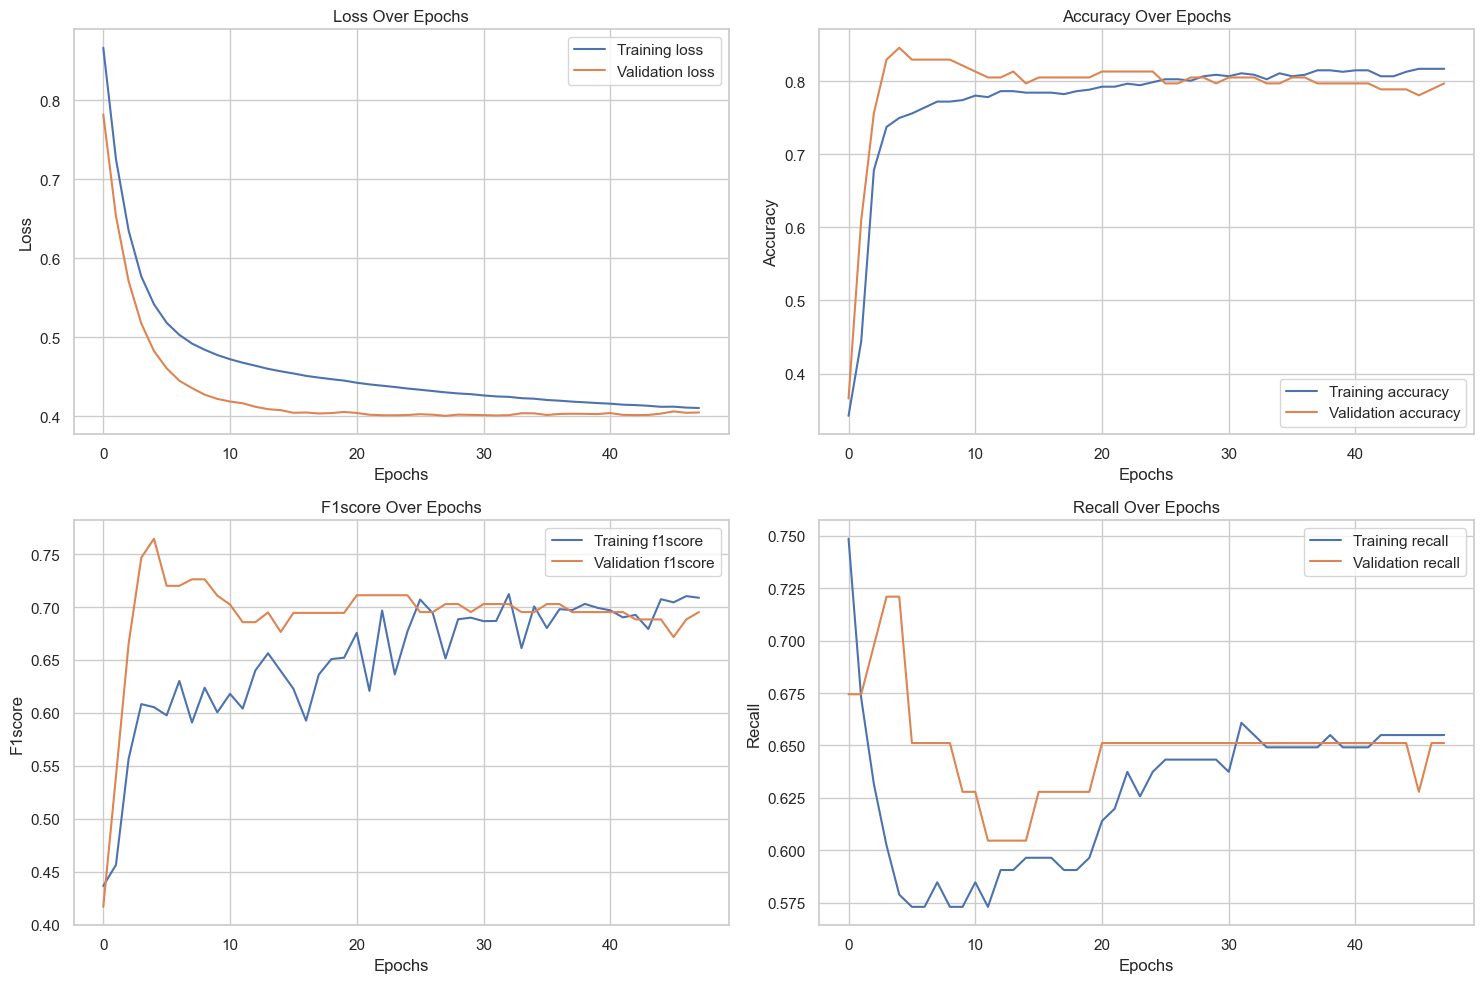

In [25]:
# Define the Multi-Layer Perceptron (MLP) model with 1 hidden layer
nn_mlp_model = keras.Sequential([
    keras.layers.Input(shape=(X_train_processed.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


nn_mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'recall', 'precision', f1score])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

nn_mlp_history = nn_mlp_model.fit(
    X_train_processed, y_train, 
    epochs=200, 
    validation_data=(X_val_processed, y_val), 
    callbacks=[early_stopping], 
    batch_size=32
)

show_epoch(nn_mlp_history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


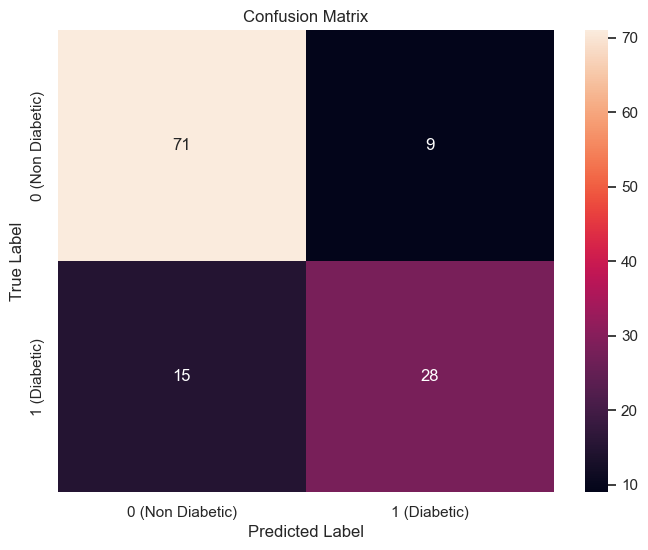

{'Model': 'NN MLP Model', 'Accuracy': 0.8048780487804879, 'Recall': 0.8048780487804879, 'Precision': 0.8015207493369717, 'F1 Score': 0.8010872759330002}


In [26]:
y_pred_nn_mlp_model = nn_mlp_model.predict(X_val_processed)
y_pred_classes_nn_mlp = (y_pred_nn_mlp_model > 0.5).astype(int)
y_true_classes_nn_mlp = y_val

nn_mlp_metrics = calculate_performance_metrics(y_true_classes_nn_mlp, y_pred_classes_nn_mlp, "NN MLP Model")
print(nn_mlp_metrics)

## 3.4 Comparing models

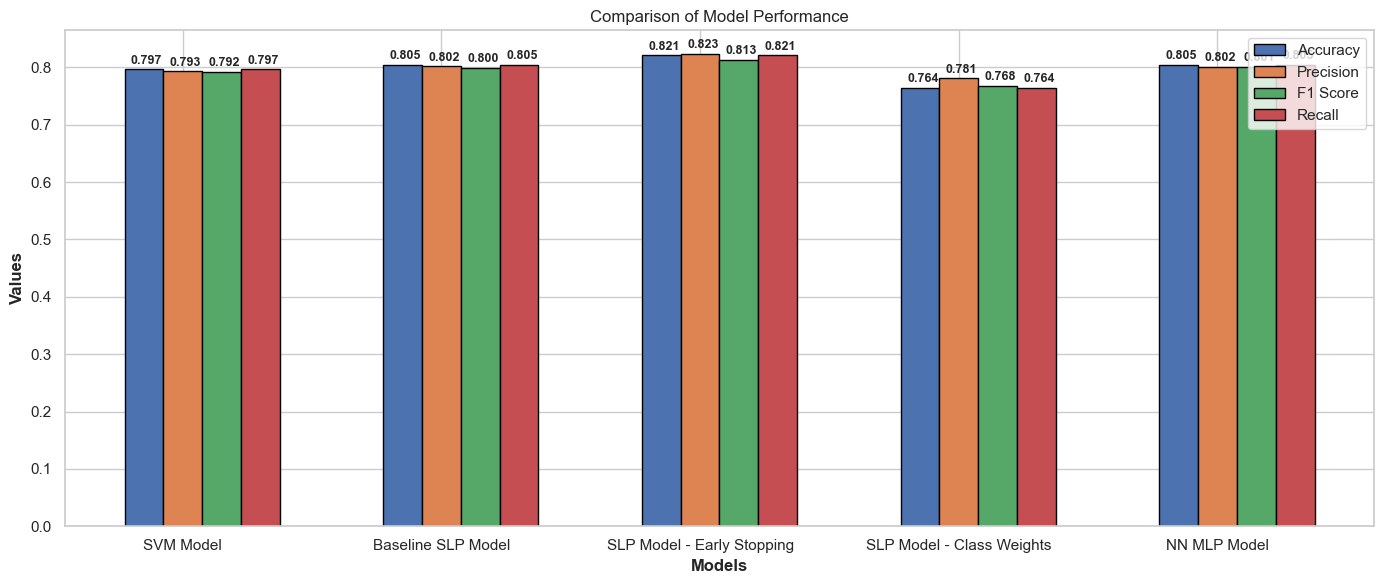

In [41]:
metrics_dicts = [svm_metrics, baseline_slp_metrics, nn_slp_metrics, slp_opt2_metrics, nn_mlp_metrics]

metrics = ['Accuracy', 'Precision', 'F1 Score', 'Recall']
model_metrics = {metrics_dict['Model']: [metrics_dict[metric] for metric in metrics] for metrics_dict in metrics_dicts}

transposed_metrics = {metric: [model_metrics[model][i] for model in model_metrics] for i, metric in enumerate(metrics)}

bar_width = 0.15
positions = np.arange(len(model_metrics))
bar_positions = [positions + i * bar_width for i in range(len(metrics))]

# Create the bar plot
plt.figure(figsize=(14, 6))

# Plotting the bars
for i, (metric, values) in enumerate(transposed_metrics.items()):
    plt.bar(bar_positions[i], values, width=bar_width, edgecolor='black', label=metric)
    for j, v in enumerate(values):
        plt.text(bar_positions[i][j] - 0.05, v + 0.01, f'{v:.3f}', fontweight='bold', fontsize=9)

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(model_metrics))], model_metrics.keys())
plt.title('Comparison of Model Performance')
plt.legend()
plt.tight_layout()
plt.show()

## 3.5 Selecting the best model

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8141 - f1score: 0.6593 - loss: 0.4269 - precision: 0.7833 - recall: 0.6076 
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8011 - f1score: 0.6539 - loss: 0.4464 - precision: 0.7476 - recall: 0.5980 
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - f1score: 0.6498 - loss: 0.4452 - precision: 0.7644 - recall: 0.5906 
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7914 - f1score: 0.6564 - loss: 0.4532 - precision: 0.7334 - recall: 0.6090 
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7866 - f1score: 0.6375 - loss: 0.4380 - precision: 0.7276 - recall: 0.5695 
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.8093 - f1score: 0.6718 - loss: 0.4390 - precision: 0.7996 - recall: 0.5931
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.8013 - f1score: 0.6536 - loss: 0.4357 - precision: 0.8085 - recall: 0.5790
Epoch 8/250

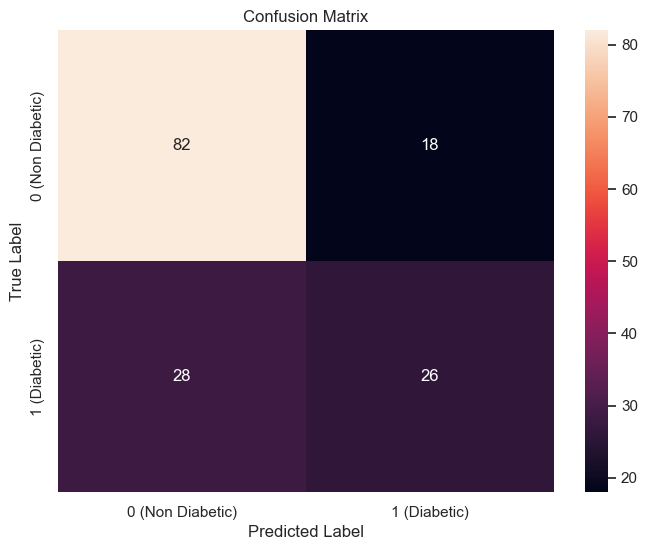

{'Model': 'Best Model', 'Accuracy': 0.7012987012987013, 'Recall': 0.7012987012987013, 'Precision': 0.6912632821723731, 'F1 Score': 0.6931707748034278}


In [29]:
best_model = slp_opt1

X_train_full_processed = preproc_pl.fit_transform(X_train_full)
X_test_processed = preproc_pl.transform(X_test)

# Train the best model on full training data
best_model.fit(X_train_full_processed, y_train_full, epochs=250, batch_size=32)

# Predict on the test set
y_pred_best_model = best_model.predict(X_test_processed)
y_pred_classes_best_model = (y_pred_best_model > 0.5).astype(int)
y_true_classes_best_model = y_test

# Calculate performance metrics for the test set
best_model_metrics = calculate_performance_metrics(y_true_classes_best_model, y_pred_classes_best_model, "Best Model")
print(best_model_metrics)